In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

def plot_client_metrics(csv_data):
    # Read the CSV data
    df = pd.read_csv(csv_data)
    
    # Get unique client IDs
    clients = sorted(df['dataset'].unique())
    
    # Metrics to plot
    metrics = ['rank1', 'rank5', 'rank10', 'mAP']
    
    for client in clients:
        client_data = df[df['dataset'] == client].copy()
        
        # Add sequence number for x-axis (just the order of measurements)
        client_data['sequence'] = range(1, len(client_data) + 1)
        
        # Print table for this client
        print(f"\nClient {client} Metrics:")
        print(tabulate(client_data[['sequence', 'timestamp'] + metrics], 
                     headers='keys', tablefmt='psql', showindex=False))
        
        # Create plot for this client
        plt.figure(figsize=(10, 6))
        
        for metric in metrics:
            plt.plot(client_data['sequence'], client_data[metric], 
                    label=metric, marker='o')
        
        plt.title(f'Client {client} Performance Over Time')
        plt.xlabel('Measurement Sequence')
        plt.ylabel('Score')
        plt.xticks(client_data['sequence'])
        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage:
# plot_client_metrics('your_data.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Load all experiment data
experiments = {
    'reg': pd.read_csv('/home/wellvw12/FedReID/model/ex2_110/results.csv'),
    'kd_cdw': pd.read_csv('/home/wellvw12/FedReID/model/ex2_110_kd_cdw/results.csv'),
}


# Add round numbers to each experiment (every 6 rows is a round)
for exp_name, df in experiments.items():
    df['round'] = (df.index // 6) + 1

# Get unique datasets and metrics
datasets = sorted(experiments['reg']['dataset'].unique())
metrics = ['rank1', 'rank5', 'mAP']
metric_names = {'rank1': '1ap', 'rank5': '5ap', 'mAP': 'map'}

# Create output directory
os.makedirs('metric_results', exist_ok=True)

# Process each dataset and metric
for dataset in datasets:
    for metric in metrics:
        # Create a DataFrame to store results
        results = pd.DataFrame(columns=['round', 'experiment', 'score'])
        
        # Collect data from all experiments
        for exp_name, df in experiments.items():
            # Filter data for this dataset and metric
            dataset_data = df[df['dataset'] == dataset]
            
            # Add to results
            exp_results = pd.DataFrame({
                'round': dataset_data['round'],
                'experiment': exp_name,
                'score': dataset_data[metric]
            })
            results = pd.concat([results, exp_results], ignore_index=True)
        
        # Sort by round and experiment
        results = results.sort_values(['round', 'experiment'])
        
        # Save to CSV
        output_filename = f'metric_results/dataset_{dataset}_{metric_names[metric]}.csv'
        results.to_csv(output_filename, index=False)
        print(f'Saved: {output_filename}')

print("All CSV files generated in 'metric_results' directory.")


Saved: metric_results/dataset_1_1ap.csv
Saved: metric_results/dataset_1_5ap.csv
Saved: metric_results/dataset_1_10ap.csv
Saved: metric_results/dataset_1_map.csv
Saved: metric_results/dataset_3_1ap.csv
Saved: metric_results/dataset_3_5ap.csv
Saved: metric_results/dataset_3_10ap.csv
Saved: metric_results/dataset_3_map.csv
Saved: metric_results/dataset_4_1ap.csv
Saved: metric_results/dataset_4_5ap.csv
Saved: metric_results/dataset_4_10ap.csv
Saved: metric_results/dataset_4_map.csv
Saved: metric_results/dataset_5_1ap.csv
Saved: metric_results/dataset_5_5ap.csv
Saved: metric_results/dataset_5_10ap.csv
Saved: metric_results/dataset_5_map.csv
Saved: metric_results/dataset_7_1ap.csv
Saved: metric_results/dataset_7_5ap.csv
Saved: metric_results/dataset_7_10ap.csv
Saved: metric_results/dataset_7_map.csv
Saved: metric_results/dataset_test_1ap.csv
Saved: metric_results/dataset_test_5ap.csv
Saved: metric_results/dataset_test_10ap.csv
Saved: metric_results/dataset_test_map.csv
All CSV files generate

/var/tmp/ipykernel_16890/1695418551.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, exp_results], ignore_index=True)
/var/tmp/ipykernel_16890/1695418551.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, exp_results], ignore_index=True)
/var/tmp/ipykernel_16890/1695418551.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Create directory for plots
os.makedirs('metric_plots', exist_ok=True)

# Get all generated CSV files
csv_files = [f for f in os.listdir('/home/wellvw12/local_fed/FedReID/metric_results') if f.endswith('.csv')]

# Plot each CSV file
for csv_file in csv_files:
    # Read the CSV
    df = pd.read_csv(f'metric_results/{csv_file}')
    
    # Extract dataset and metric from filename
    dataset = csv_file.split('_')[1]
    metric = csv_file.split('_')[2].split('.')[0]
    
    # Create plot
    plt.figure(figsize=(10, 6))
    
    # Plot each experiment's data
    for exp_name in df['experiment'].unique():
        exp_data = df[df['experiment'] == exp_name]
        plt.plot(exp_data['round'], exp_data['score'], 
                marker='o', label=exp_name)
    
    # Customize plot
    plt.title(f'Dataset {dataset} - {metric.upper()} Progress')
    plt.xlabel('Round Number')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    
    # Save plot
    plot_filename = f'metric_plots/{csv_file.replace(".csv", ".png")}'
    plt.savefig(plot_filename, bbox_inches='tight', dpi=300)
    plt.close()
    print(f'Saved plot: {plot_filename}')

print("All plots generated in 'metric_plots' directory.")

Saved plot: metric_plots/dataset_test_5ap.png
Saved plot: metric_plots/dataset_1_5ap.png
Saved plot: metric_plots/dataset_4_5ap.png
Saved plot: metric_plots/dataset_4_1ap.png
Saved plot: metric_plots/dataset_5_5ap.png
Saved plot: metric_plots/dataset_test_1ap.png
Saved plot: metric_plots/dataset_3_10ap.png
Saved plot: metric_plots/dataset_4_10ap.png
Saved plot: metric_plots/dataset_7_map.png
Saved plot: metric_plots/dataset_5_map.png
Saved plot: metric_plots/dataset_5_10ap.png
Saved plot: metric_plots/dataset_1_map.png
Saved plot: metric_plots/dataset_4_map.png
Saved plot: metric_plots/dataset_3_map.png
Saved plot: metric_plots/dataset_1_10ap.png
Saved plot: metric_plots/dataset_1_1ap.png
Saved plot: metric_plots/dataset_7_1ap.png
Saved plot: metric_plots/dataset_test_10ap.png
Saved plot: metric_plots/dataset_test_map.png
Saved plot: metric_plots/dataset_5_1ap.png
Saved plot: metric_plots/dataset_7_10ap.png
Saved plot: metric_plots/dataset_3_1ap.png
Saved plot: metric_plots/dataset_3_5

# **Experiment 4 regular no optimisation**


Client 1 Metrics:
+------------+---------------------+---------+---------+----------+--------+
|   sequence | timestamp           |   rank1 |   rank5 |   rank10 |    mAP |
|------------+---------------------+---------+---------+----------+--------|
|          1 | 2025-06-19 12:47:37 |  0.5312 |  0.6562 |   0.6875 | 0.3228 |
|          2 | 2025-06-19 13:31:02 |  0.5625 |  0.6562 |   0.8438 | 0.3321 |
|          3 | 2025-06-19 14:13:39 |  0.5625 |  0.6562 |   0.8438 | 0.3603 |
|          4 | 2025-06-19 14:53:35 |  0.5938 |  0.7812 |   0.875  | 0.3964 |
|          5 | 2025-06-19 15:34:43 |  0.6562 |  0.75   |   0.8438 | 0.4179 |
|          6 | 2025-06-19 16:17:27 |  0.6875 |  0.7812 |   0.8438 | 0.4528 |
|          7 | 2025-06-19 16:58:08 |  0.5938 |  0.75   |   0.8438 | 0.4088 |
|          8 | 2025-06-19 17:42:47 |  0.6875 |  0.7812 |   0.8438 | 0.5098 |
|          9 | 2025-06-19 18:24:30 |  0.6562 |  0.75   |   0.875  | 0.4594 |
|         10 | 2025-06-19 19:06:01 |  0.6562 |  0.8125 | 

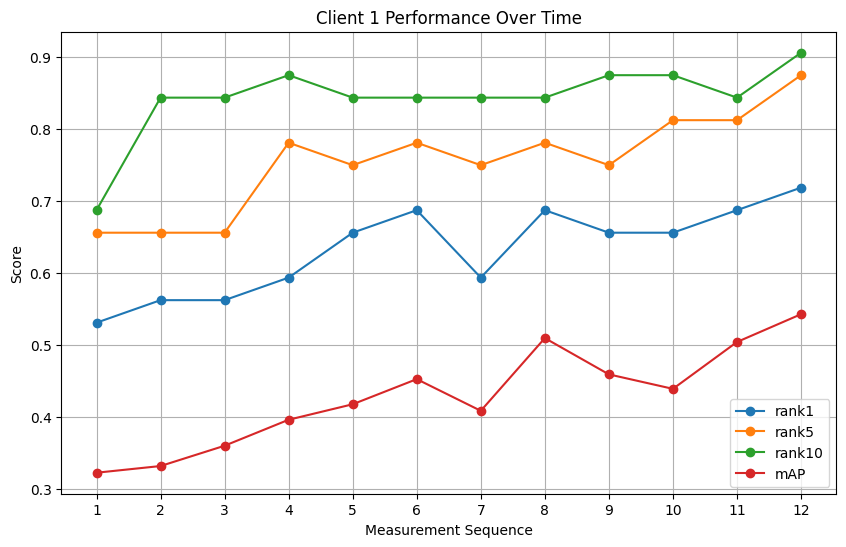


Client 2 Metrics:
+------------+---------------------+---------+---------+----------+--------+
|   sequence | timestamp           |   rank1 |   rank5 |   rank10 |    mAP |
|------------+---------------------+---------+---------+----------+--------|
|          1 | 2025-06-19 12:47:57 |  0.3333 |  0.625  |   0.7083 | 0.2417 |
|          2 | 2025-06-19 13:31:22 |  0.5    |  0.75   |   0.875  | 0.4155 |
|          3 | 2025-06-19 14:13:59 |  0.5833 |  0.75   |   0.9167 | 0.4625 |
|          4 | 2025-06-19 14:53:56 |  0.5417 |  0.7917 |   0.9583 | 0.4641 |
|          5 | 2025-06-19 15:35:03 |  0.5    |  0.75   |   0.875  | 0.4627 |
|          6 | 2025-06-19 16:17:48 |  0.5833 |  0.75   |   0.9583 | 0.4966 |
|          7 | 2025-06-19 16:58:28 |  0.5    |  0.875  |   0.9583 | 0.4617 |
|          8 | 2025-06-19 17:43:07 |  0.5417 |  0.6667 |   0.875  | 0.4717 |
|          9 | 2025-06-19 18:24:51 |  0.5    |  0.75   |   0.8333 | 0.4258 |
|         10 | 2025-06-19 19:06:21 |  0.5833 |  0.875  | 

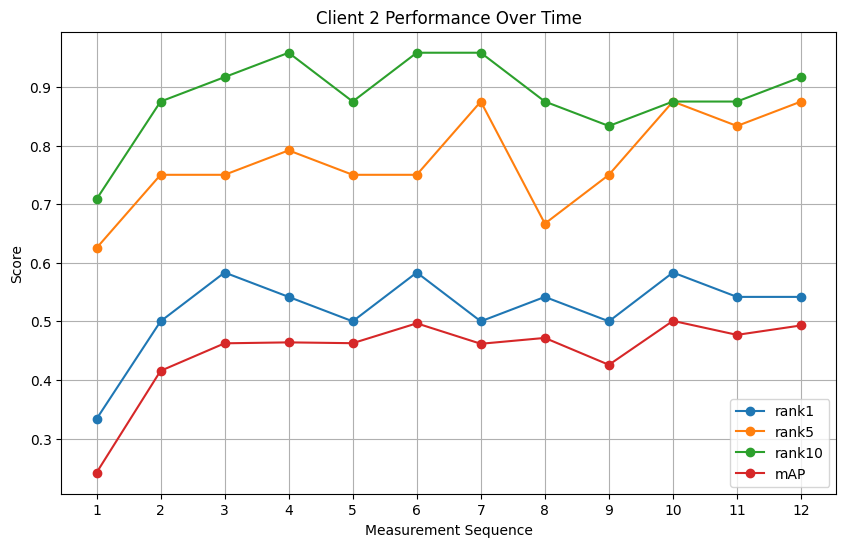


Client 3 Metrics:
+------------+---------------------+---------+---------+----------+--------+
|   sequence | timestamp           |   rank1 |   rank5 |   rank10 |    mAP |
|------------+---------------------+---------+---------+----------+--------|
|          1 | 2025-06-19 12:48:23 |  0.375  |  0.5833 |   0.6875 | 0.1876 |
|          2 | 2025-06-19 13:31:50 |  0.4167 |  0.6667 |   0.7708 | 0.25   |
|          3 | 2025-06-19 14:14:27 |  0.4583 |  0.7292 |   0.7917 | 0.2768 |
|          4 | 2025-06-19 14:54:22 |  0.4583 |  0.75   |   0.8333 | 0.3103 |
|          5 | 2025-06-19 15:35:30 |  0.5208 |  0.6875 |   0.8542 | 0.3607 |
|          6 | 2025-06-19 16:18:16 |  0.5625 |  0.7708 |   0.8333 | 0.3832 |
|          7 | 2025-06-19 16:58:56 |  0.4792 |  0.75   |   0.875  | 0.3751 |
|          8 | 2025-06-19 17:43:35 |  0.5417 |  0.8125 |   0.875  | 0.4437 |
|          9 | 2025-06-19 18:25:18 |  0.6042 |  0.8333 |   0.875  | 0.4607 |
|         10 | 2025-06-19 19:06:47 |  0.625  |  0.8125 | 

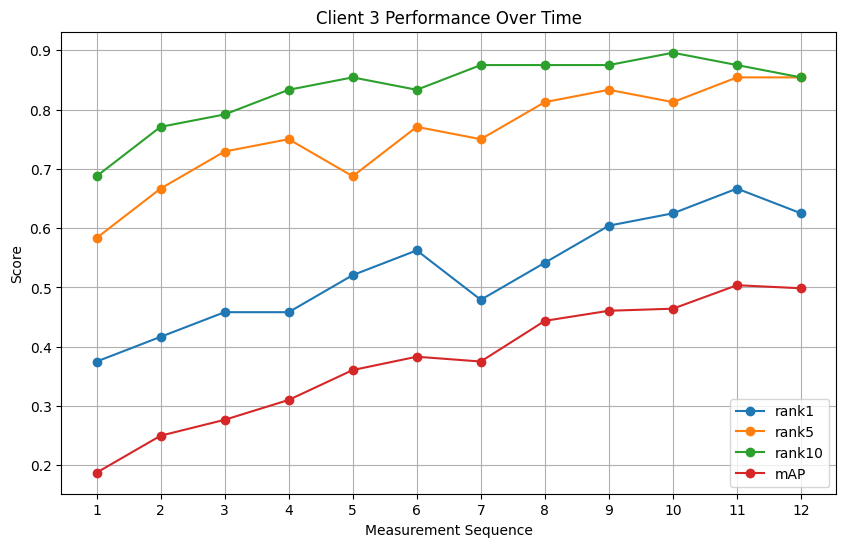


Client 4 Metrics:
+------------+---------------------+---------+---------+----------+--------+
|   sequence | timestamp           |   rank1 |   rank5 |   rank10 |    mAP |
|------------+---------------------+---------+---------+----------+--------|
|          1 | 2025-06-19 12:48:48 |  0.5745 |  0.7021 |   0.7872 | 0.329  |
|          2 | 2025-06-19 13:32:16 |  0.6596 |  0.766  |   0.8298 | 0.4282 |
|          3 | 2025-06-19 14:14:53 |  0.6596 |  0.8085 |   0.8298 | 0.4667 |
|          4 | 2025-06-19 14:54:48 |  0.7021 |  0.8085 |   0.8298 | 0.5291 |
|          5 | 2025-06-19 15:35:55 |  0.7021 |  0.8085 |   0.8511 | 0.5014 |
|          6 | 2025-06-19 16:18:42 |  0.7234 |  0.8085 |   0.8511 | 0.5542 |
|          7 | 2025-06-19 16:59:23 |  0.6809 |  0.8085 |   0.8511 | 0.5685 |
|          8 | 2025-06-19 17:44:02 |  0.7021 |  0.8298 |   0.8723 | 0.5799 |
|          9 | 2025-06-19 18:25:43 |  0.7021 |  0.8298 |   0.8936 | 0.5552 |
|         10 | 2025-06-19 19:07:13 |  0.7021 |  0.8936 | 

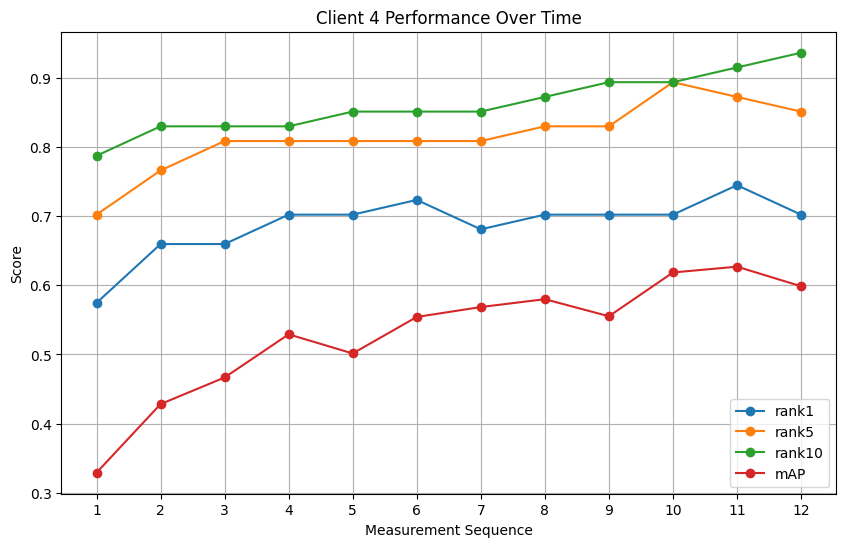

In [4]:
plot_client_metrics('/home/wellvw12/local_fed/FedReID/results_summary.csv')


Client 1 Metrics:
+------------+---------------------+---------+---------+----------+--------+
|   sequence | timestamp           |   rank1 |   rank5 |   rank10 |    mAP |
|------------+---------------------+---------+---------+----------+--------|
|          1 | 2025-06-21 14:56:59 |  0.8077 |  0.8846 |   0.8846 | 0.64   |
|          2 | 2025-06-21 15:29:14 |  0.7308 |  0.8846 |   0.8846 | 0.6403 |
|          3 | 2025-06-21 16:01:08 |  0.8077 |  0.8846 |   0.8846 | 0.6753 |
|          4 | 2025-06-21 16:34:12 |  0.7692 |  0.8462 |   0.9231 | 0.6575 |
|          5 | 2025-06-21 17:06:34 |  0.7308 |  0.8846 |   0.9231 | 0.6724 |
|          6 | 2025-06-21 17:39:05 |  0.7692 |  0.8462 |   0.9231 | 0.6673 |
|          7 | 2025-06-21 18:12:12 |  0.7308 |  0.8462 |   0.9231 | 0.6832 |
|          8 | 2025-06-21 18:44:35 |  0.7308 |  0.8846 |   0.9615 | 0.6775 |
|          9 | 2025-06-21 19:18:32 |  0.7692 |  0.8462 |   0.9231 | 0.6762 |
|         10 | 2025-06-21 19:51:59 |  0.7308 |  0.8846 | 

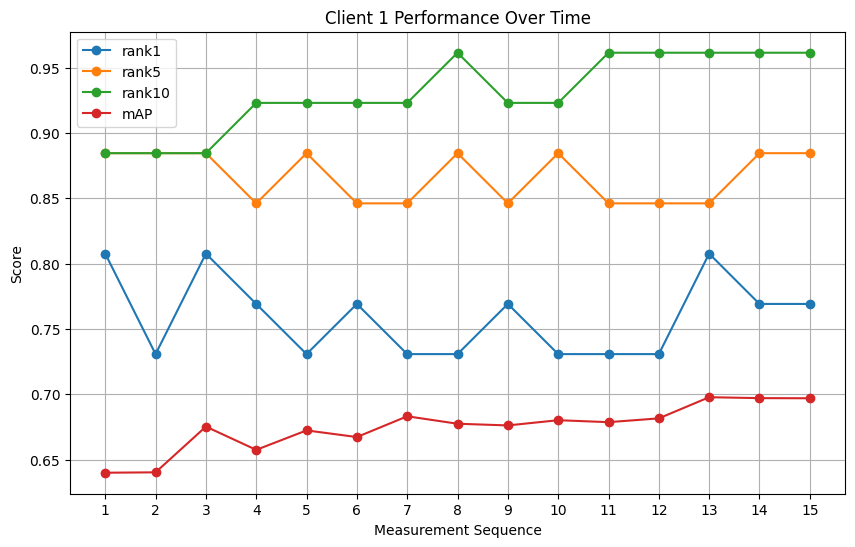


Client 3 Metrics:
+------------+---------------------+---------+---------+----------+--------+
|   sequence | timestamp           |   rank1 |   rank5 |   rank10 |    mAP |
|------------+---------------------+---------+---------+----------+--------|
|          1 | 2025-06-21 14:57:22 |  0.6571 |  0.7714 |   0.7714 | 0.4978 |
|          2 | 2025-06-21 15:29:37 |  0.7143 |  0.8    |   0.8286 | 0.603  |
|          3 | 2025-06-21 16:01:32 |  0.7143 |  0.8571 |   0.8857 | 0.631  |
|          4 | 2025-06-21 16:34:35 |  0.7143 |  0.8571 |   0.9143 | 0.6488 |
|          5 | 2025-06-21 17:06:57 |  0.7143 |  0.8286 |   0.9143 | 0.6426 |
|          6 | 2025-06-21 17:39:28 |  0.7143 |  0.8286 |   0.9143 | 0.6655 |
|          7 | 2025-06-21 18:12:35 |  0.7143 |  0.8571 |   0.9143 | 0.6605 |
|          8 | 2025-06-21 18:44:59 |  0.7143 |  0.8286 |   0.9143 | 0.6618 |
|          9 | 2025-06-21 19:18:55 |  0.6857 |  0.8571 |   0.8857 | 0.6689 |
|         10 | 2025-06-21 19:52:23 |  0.7714 |  0.8571 | 

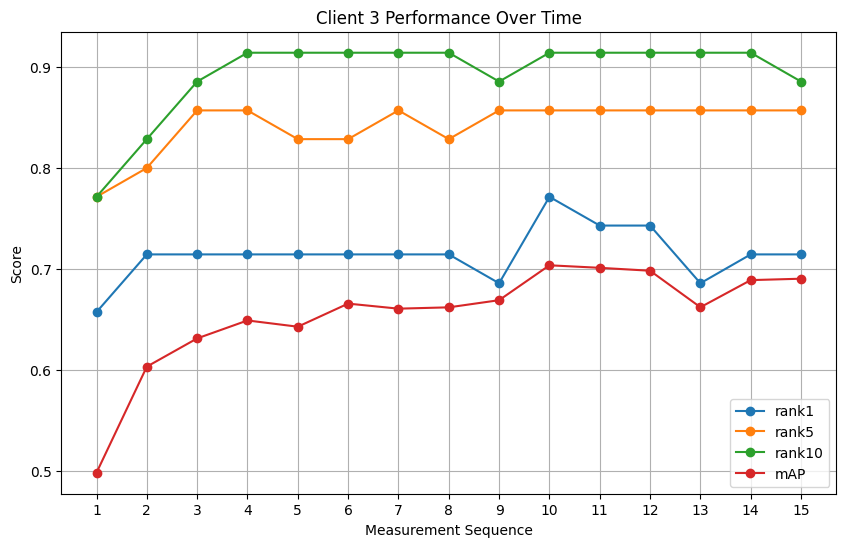


Client 4 Metrics:
+------------+---------------------+---------+---------+----------+--------+
|   sequence | timestamp           |   rank1 |   rank5 |   rank10 |    mAP |
|------------+---------------------+---------+---------+----------+--------|
|          1 | 2025-06-21 14:57:45 |  0.5758 |  0.7879 |   0.8485 | 0.5282 |
|          2 | 2025-06-21 15:30:00 |  0.6667 |  0.8788 |   0.9091 | 0.6318 |
|          3 | 2025-06-21 16:01:54 |  0.697  |  0.8182 |   0.8485 | 0.6343 |
|          4 | 2025-06-21 16:34:58 |  0.6364 |  0.7273 |   0.8485 | 0.6164 |
|          5 | 2025-06-21 17:07:20 |  0.6667 |  0.8485 |   0.9091 | 0.6523 |
|          6 | 2025-06-21 17:39:51 |  0.697  |  0.8182 |   0.8485 | 0.6536 |
|          7 | 2025-06-21 18:12:58 |  0.697  |  0.7576 |   0.8182 | 0.6547 |
|          8 | 2025-06-21 18:45:21 |  0.6667 |  0.7879 |   0.8485 | 0.6471 |
|          9 | 2025-06-21 19:19:18 |  0.6667 |  0.7879 |   0.8182 | 0.6481 |
|         10 | 2025-06-21 19:52:45 |  0.6667 |  0.7576 | 

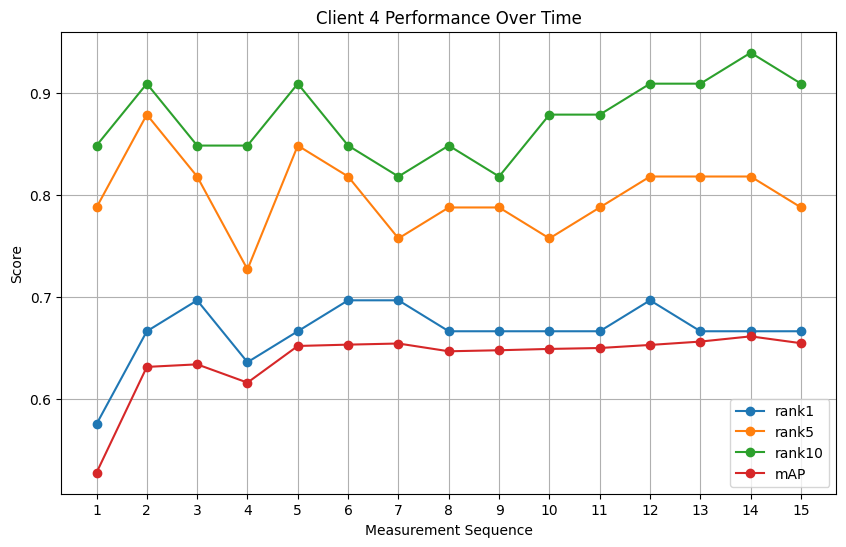


Client 5 Metrics:
+------------+---------------------+---------+---------+----------+--------+
|   sequence | timestamp           |   rank1 |   rank5 |   rank10 |    mAP |
|------------+---------------------+---------+---------+----------+--------|
|          1 | 2025-06-21 14:58:04 |  0.6471 |  1      |   1      | 0.6235 |
|          2 | 2025-06-21 15:30:19 |  0.5294 |  0.9412 |   0.9412 | 0.6029 |
|          3 | 2025-06-21 16:02:13 |  0.6471 |  1      |   1      | 0.6569 |
|          4 | 2025-06-21 16:35:17 |  0.7059 |  0.9412 |   0.9412 | 0.6796 |
|          5 | 2025-06-21 17:07:39 |  0.6471 |  0.9412 |   0.9412 | 0.6937 |
|          6 | 2025-06-21 17:40:10 |  0.6471 |  0.8824 |   0.9412 | 0.7007 |
|          7 | 2025-06-21 18:13:17 |  0.6471 |  0.9412 |   0.9412 | 0.7112 |
|          8 | 2025-06-21 18:45:41 |  0.7059 |  0.9412 |   1      | 0.728  |
|          9 | 2025-06-21 19:19:37 |  0.6471 |  0.9412 |   1      | 0.7222 |
|         10 | 2025-06-21 19:53:05 |  0.6471 |  0.9412 | 

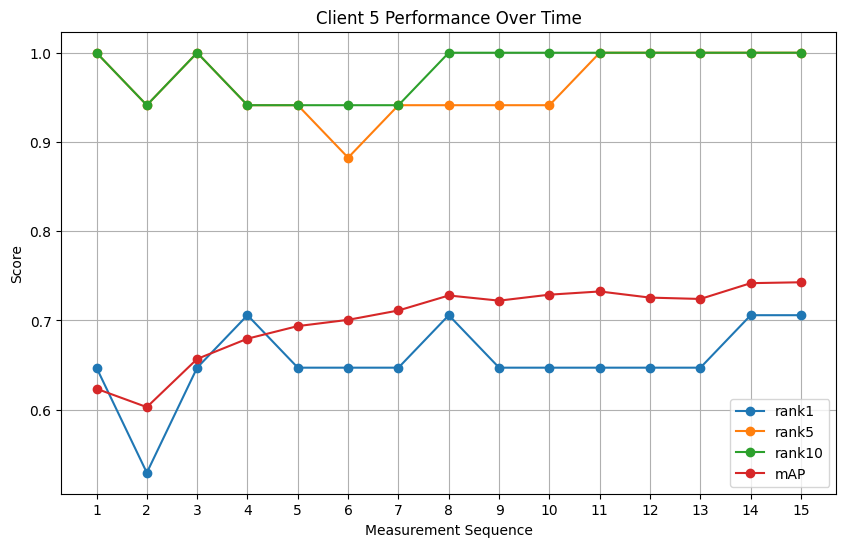


Client 7 Metrics:
+------------+---------------------+---------+---------+----------+--------+
|   sequence | timestamp           |   rank1 |   rank5 |   rank10 |    mAP |
|------------+---------------------+---------+---------+----------+--------|
|          1 | 2025-06-21 14:58:25 |  0.6667 |  0.8333 |   0.9333 | 0.5947 |
|          2 | 2025-06-21 15:30:41 |  0.7    |  0.8333 |   0.9    | 0.6696 |
|          3 | 2025-06-21 16:02:35 |  0.8    |  0.8333 |   0.9    | 0.751  |
|          4 | 2025-06-21 16:35:39 |  0.7667 |  0.8333 |   0.8667 | 0.744  |
|          5 | 2025-06-21 17:08:01 |  0.8    |  0.8333 |   0.9333 | 0.765  |
|          6 | 2025-06-21 17:40:31 |  0.7667 |  0.8    |   0.8333 | 0.7546 |
|          7 | 2025-06-21 18:13:39 |  0.7667 |  0.8333 |   0.9333 | 0.7525 |
|          8 | 2025-06-21 18:46:02 |  0.7667 |  0.8    |   0.9333 | 0.7604 |
|          9 | 2025-06-21 19:19:59 |  0.7667 |  0.8    |   0.8667 | 0.7618 |
|         10 | 2025-06-21 19:53:26 |  0.8    |  0.8    | 

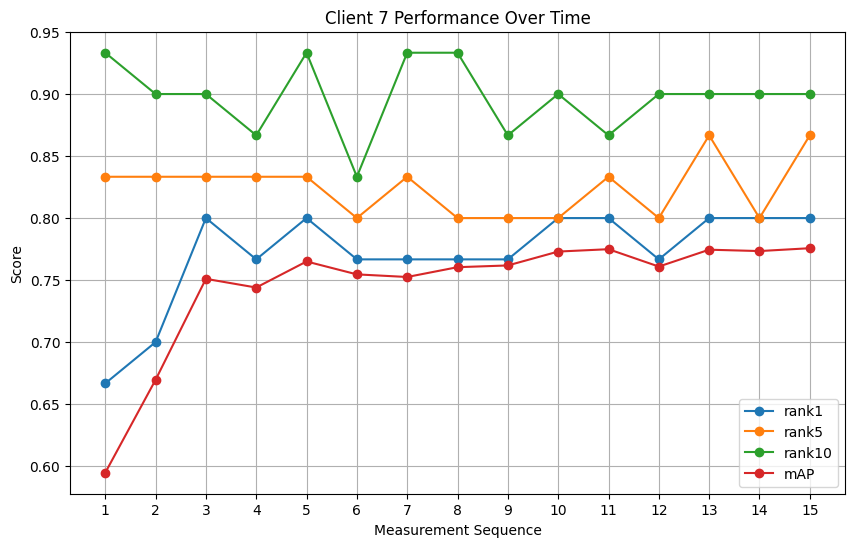


Client test Metrics:
+------------+---------------------+---------+---------+----------+--------+
|   sequence | timestamp           |   rank1 |   rank5 |   rank10 |    mAP |
|------------+---------------------+---------+---------+----------+--------|
|          1 | 2025-06-21 14:58:57 |  0.2329 |  0.2603 |   0.3014 | 0.1279 |
|          2 | 2025-06-21 15:31:13 |  0.2329 |  0.274  |   0.2877 | 0.1237 |
|          3 | 2025-06-21 16:03:07 |  0.2192 |  0.2603 |   0.274  | 0.1224 |
|          4 | 2025-06-21 16:36:11 |  0.2192 |  0.2603 |   0.3014 | 0.1294 |
|          5 | 2025-06-21 17:08:33 |  0.2192 |  0.2603 |   0.2877 | 0.1274 |
|          6 | 2025-06-21 17:41:03 |  0.2192 |  0.2603 |   0.274  | 0.1274 |
|          7 | 2025-06-21 18:14:10 |  0.2329 |  0.2603 |   0.274  | 0.1294 |
|          8 | 2025-06-21 18:46:35 |  0.2329 |  0.2603 |   0.2877 | 0.1292 |
|          9 | 2025-06-21 19:20:30 |  0.2329 |  0.2603 |   0.2603 | 0.1298 |
|         10 | 2025-06-21 19:53:57 |  0.2329 |  0.2603

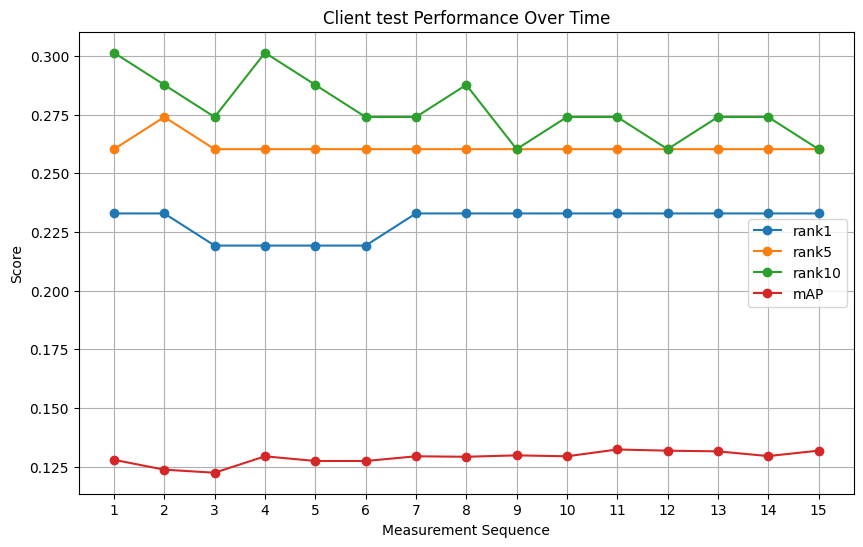

In [2]:
plot_client_metrics('/home/wellvw12/local_fed/FedReID/model/ex2_110_kd_cdw/kd_cdw.csv')

In [4]:
import pandas as pd 
df = pd.read_csv('/home/wellvw12/local_fed/FedReID/results_summary_1.csv')
df

,timestamp,dataset,rank1,rank5,rank10,mAP
0,2025-06-19 12:47:37,1,0.5312,0.6562,0.6875,0.3228
1,2025-06-19 12:47:57,2,0.3333,0.6250,0.7083,0.2417
2,2025-06-19 12:48:23,3,0.3750,0.5833,0.6875,0.1876
3,2025-06-19 12:48:48,4,0.5745,0.7021,0.7872,0.3290
4,2025-06-19 13:31:02,1,0.5625,0.6562,0.8438,0.3321
5,2025-06-19 13:31:22,2,0.5000,0.7500,0.8750,0.4155
6,2025-06-19 13:31:50,3,0.4167,0.6667,0.7708,0.2500
7,2025-06-19 13:32:16,4,0.6596,0.7660,0.8298,0.4282
8,2025-06-19 14:13:39,1,0.5625,0.6562,0.8438,0.3603
9,2025-06-19 14:13:59,2,0.5833,0.7500,0.9167,0.4625
